In [1]:
from __future__ import print_function
from pythtb import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# define the lattice vectors and the coordinates of orbitals
lat = [[1.0, 0.0], [0.0, 1.0]]
orb = [[0.0, 0.0], [0.5, 0.5]]

In [3]:
# define your model by making a 2D tight-binding checkboard model
my_model = tb_model(2,2,lat, orb)

In [4]:
# set model parameters
delta = 1.1
t = 0.6

In [5]:
# set on-site energies

# the first parameter includes a list of on-site energies for each orbital
# if this function is never called, the on-site energy is assumed to be zero
my_model.set_onsite([-delta, delta])

In [6]:
# set hoppings (one for each connected pair of orbitals)
# (hopping amplitude, i (index of orbital in the home unit cell), j, [lattice vector to cell containing j])

# hopping from the "first" orbital in the home unit cell to the "zeroth" orbital which is still in the home unit
# cell (indicated by the lattice vector [0, 0])
my_model.set_hop(t, 1, 0, [0, 0])

my_model.set_hop(t, 1, 0, [1, 0])
my_model.set_hop(t, 1, 0, [0, 1])
my_model.set_hop(t, 1, 0, [1, 1])

In [7]:
# print or display the tight-binding model
my_model.display()

---------------------------------------
report of tight-binding model
---------------------------------------
k-space dimension           = 2
r-space dimension           = 2
number of spin components   = 1
periodic directions         = [0, 1]
number of orbitals          = 2
number of electronic states = 2
lattice vectors:
 #  0  ===>  [     1.0 ,     0.0 ]
 #  1  ===>  [     0.0 ,     1.0 ]
positions of orbitals:
 #  0  ===>  [     0.0 ,     0.0 ]
 #  1  ===>  [     0.5 ,     0.5 ]
site energies:
 #  0  ===>      -1.1
 #  1  ===>       1.1
hoppings:
<  1 | H |  0 + [  0 ,  0 ] >     ===>      0.6 +     0.0 i
<  1 | H |  0 + [  1 ,  0 ] >     ===>      0.6 +     0.0 i
<  1 | H |  0 + [  0 ,  1 ] >     ===>      0.6 +     0.0 i
<  1 | H |  0 + [  1 ,  1 ] >     ===>      0.6 +     0.0 i
hopping distances:
|  pos(  1 )  - pos(  0 + [  0 ,  0 ] ) |  =    0.7071
|  pos(  1 )  - pos(  0 + [  1 ,  0 ] ) |  =    0.7071
|  pos(  1 )  - pos(  0 + [  0 ,  1 ] ) |  =    0.7071
|  pos(  1 )  - pos(

In [15]:
# generate the k-point path and labels
path= [[0.0,0.0],[0.0,0.5],[0.5,0.5],[0.0,0.0]]
label = (r'$\Gamma $',r'$X$', r'$M$', r'$\Gamma $')
(k_vec, k_dist, k_node) = my_model.k_path(path, 21, report=False)
print(k_vec)
print(k_dist)
print(k_node)

[[0.         0.        ]
 [0.         0.08333333]
 [0.         0.16666667]
 [0.         0.25      ]
 [0.         0.33333333]
 [0.         0.41666667]
 [0.         0.5       ]
 [0.08333333 0.5       ]
 [0.16666667 0.5       ]
 [0.25       0.5       ]
 [0.33333333 0.5       ]
 [0.41666667 0.5       ]
 [0.5        0.5       ]
 [0.4375     0.4375    ]
 [0.375      0.375     ]
 [0.3125     0.3125    ]
 [0.25       0.25      ]
 [0.1875     0.1875    ]
 [0.125      0.125     ]
 [0.0625     0.0625    ]
 [0.         0.        ]]
[0.         0.08333333 0.16666667 0.25       0.33333333 0.41666667
 0.5        0.58333333 0.66666667 0.75       0.83333333 0.91666667
 1.         1.08838835 1.1767767  1.26516504 1.35355339 1.44194174
 1.53033009 1.61871843 1.70710678]
[0.         0.5        1.         1.70710678]


In [9]:
print('---------------------------------------')
print('starting calculation')
print('---------------------------------------')
print('Calculating bands...')

---------------------------------------
starting calculation
---------------------------------------
Calculating bands...


In [10]:
# solve for the eigenenergies of the Hamiltonian on the set of k-points above
evals = my_model.solve_all(k_vec)
print(evals)

[[-2.64007576 -2.63972819 -2.63868567 -2.6369487  -2.63451813 -2.63139512
  -2.6275812  -2.62307824 -2.61788842 -2.61201429 -2.60545873 -2.59822498
  -2.59031661 -2.58173755 -2.57249208 -2.56258483 -2.5520208  -2.54080535
  -2.5289442  -2.51644345 -2.50330956 -2.4895494  -2.4751702  -2.4601796
  -2.44458563 -2.42839674 -2.41162179 -2.39427008 -2.37635131 -2.35787567
  -2.3388538  -2.31929678 -2.29921622 -2.27862421 -2.25753335 -2.2359568
  -2.21390826 -2.191402   -2.16845291 -2.1450765  -2.12128893 -2.09710704
  -2.07254839 -2.0476313  -2.02237484 -1.99679896 -1.97092444 -1.94477301
  -1.91836734 -1.89173116 -1.86488926 -1.83786759 -1.8106933  -1.78339485
  -1.75600204 -1.72854613 -1.70105989 -1.67357773 -1.64613575 -1.61877185
  -1.59152582 -1.56443945 -1.53755661 -1.51092331 -1.48458785 -1.45860081
  -1.43301517 -1.40788628 -1.38327193 -1.35923227 -1.33582979 -1.31312915
  -1.29119705 -1.27010196 -1.2499138  -1.23070355 -1.21254272 -1.1955028
  -1.17965452 -1.16506711 -1.15180738 -1.

Plotting the band structure...
[0.         0.5        1.         1.70710678]


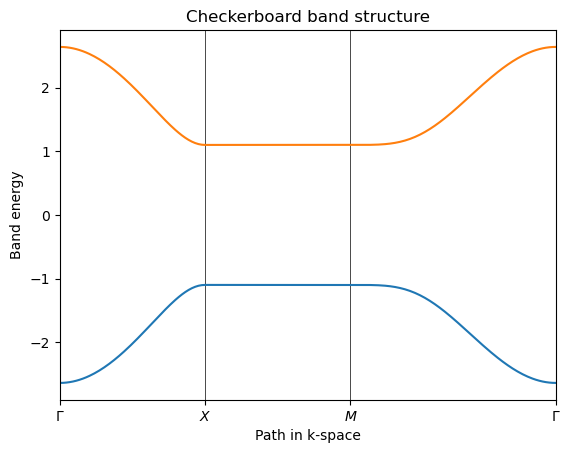

In [11]:
# plotting of band structure
print('Plotting the band structure...')
fig, ax = plt.subplots()
ax.set_xlim(k_node[0], k_node[-1])
ax.set_xticks(k_node)
ax.set_xticklabels(label)
print(k_node)

for n in range(len(k_node)):
    ax.axvline(x=k_node[n], linewidth=0.5, color='k')

# plot the bands
for n in range(2):
    ax.plot(k_dist, evals[n])

# put title
ax.set_title('Checkerboard band structure')
ax.set_xlabel('Path in k-space')
ax.set_ylabel('Band energy')

fig.savefig('2D Tight-Binding Checkerboard Model.pdf')